In [27]:
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from textblob import TextBlob, Word, Blobber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+','',text)
    text = re.sub(r'https?:\/\/.*[\r\n]*','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    return text

In [29]:
def change(x):
    if x > 0:
        return 'P'
    elif x == 0:
        return 'NEU'
    else:
        return 'N'

In [30]:
df = pd.read_csv('data.csv',sep=',')
df

,user_id,tweet
0,1332502668833599488,"@GKeile Aft #Russia got #Trump electd, #Republ..."
1,1332502657689284610,#Pennsylvania citizens SPEAK OUT! #Trump won
2,1332502614685040640,@milaura105 @Laconic_doc @mrddmia @Cernovich @...
3,1332502588877488128,Trump is the new “Nigerian Prince” #inbreds #T...
4,1332502579738079233,I'm curious how much @realDonaldTrump paid for...
...,...,...
7218,1332250299243913216,#Trump: United States President Donald Trump s...
7219,1332250299189358593,@realDonaldTrump Biden did not *over perform.*...
7220,1332250250543853568,Pa. Commonwealth Court orders halt to certific...
7221,1332250238166458370,"Denial, and Resignation, From Trump and a Hand..."


In [31]:
df['tweet'] =  df['tweet'].apply(clean_text)
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['polarity'] = df['polarity'].apply(change)
df

,user_id,tweet,polarity
0,1332502668833599488,"Aft Russia got Trump electd, Republicans n sh...",NEU
1,1332502657689284610,Pennsylvania citizens SPEAK OUT! Trump won,NEU
2,1332502614685040640,_doc Every court case through Trump cases ...,NEU
3,1332502588877488128,Trump is the new “Nigerian Prince” inbreds Trump,P
4,1332502579738079233,I'm curious how much paid for each of the ext...,P
...,...,...,...
7218,1332250299243913216,Trump: United States President Donald Trump sa...,NEU
7219,1332250299189358593,Biden did not *over perform.*Trump *UNDER* pe...,NEU
7220,1332250250543853568,Pa. Commonwealth Court orders halt to certific...,N
7221,1332250238166458370,"Denial, and Resignation, From Trump and a Hand...",P


In [32]:
x = df['tweet']
y = df['polarity'].to_list()

In [33]:
print('Replica y_train:', sorted(Counter(y).items()))

Replica y_train: [('N', 1590), ('NEU', 3398), ('P', 2235)]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=8675309)

In [35]:
print('Replica train: {0}, size {1}'.format(sorted(Counter(y_train).items()), len(y_train)))
print('Replica test: {0}, size {1}'.format(sorted(Counter(y_test).items()), len(y_test)))

Replica train: [('N', 1131), ('NEU', 2381), ('P', 1544)], size 5056
Replica test: [('N', 459), ('NEU', 1017), ('P', 691)], size 2167


# Bag of words


In [40]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet']).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=675309)

In [42]:
print('Replica train: {0}, size {1}'.format(sorted(Counter(y_train).items()), len(y_train)))
print('Replica test: {0}, size {1}'.format(sorted(Counter(y_test).items()), len(y_test)))

Replica train: [('N', 1112), ('NEU', 2371), ('P', 1573)], size 5056
Replica test: [('N', 478), ('NEU', 1027), ('P', 662)], size 2167


# Oversampling      
Se hace un oversampling ya que se puede observar que las muestras tanto de entramiento como de test están desbalanceadas, lo que afectaría el accuracy del modelo

In [43]:
ros = RandomOverSampler(random_state=1000)
x_train, y_train = ros.fit_resample(x_train, y_train)
x_test, y_test = ros.fit_resample(x_test, y_test)
print('RandomOverSampler train:', sorted(Counter(y_train).items()))
print('RandomOverSampler test:', sorted(Counter(y_test).items()))

RandomOverSampler train: [('N', 2371), ('NEU', 2371), ('P', 2371)]
RandomOverSampler test: [('N', 1027), ('NEU', 1027), ('P', 1027)]


# Logistic Regresion

In [44]:
classifier = LogisticRegression(C=10, solver='lbfgs', multi_class='multinomial',max_iter=1000) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [45]:
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[660 281  86]
 [ 47 934  46]
 [ 48 193 786]]


In [46]:
print('\nClasification Report')
print(classification_report(y_test, y_pred))
cv_score = np.mean(cross_val_score(classifier, x_train,y_train, cv=3, scoring='accuracy'))


Clasification Report
              precision    recall  f1-score   support

           N       0.87      0.64      0.74      1027
         NEU       0.66      0.91      0.77      1027
           P       0.86      0.77      0.81      1027

    accuracy                           0.77      3081
   macro avg       0.80      0.77      0.77      3081
weighted avg       0.80      0.77      0.77      3081



In [47]:
accuracy = accuracy_score(y_test, y_pred) #% de veces que el modelo acerta
recall = recall_score(y_test, y_pred, average='macro')# el modelo es capar de identificar un 95%
precision = precision_score(y_test, y_pred, average='weighted') # el modelo se equivoca un 5% en las veces que hace la predicción 
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: {}%'.format(round(accuracy, 2)*100))
print('Recall: {}%'.format(round(recall, 2)*100))
print('Precision: {}%'.format(round(precision, 2)*100))
print('F1: {}%'.format(round(f1, 2)*100))

Accuracy: 77.0%
Recall: 77.0%
Precision: 80.0%
F1: 77.0%


# Wordclouds

In [48]:
t_cat=df.groupby('polarity')
positiveTweets=pd.DataFrame()
negativeTweets=pd.DataFrame()

for namec,tweetcat in t_cat:
    if namec=='P':
        positiveTweets=tweetcat
    elif namec=='N':
        negativeTweets=tweetcat

# Nube de palabras para visualizar las palabras mas frecuentes presentes en los tweets clasificados como positivos.


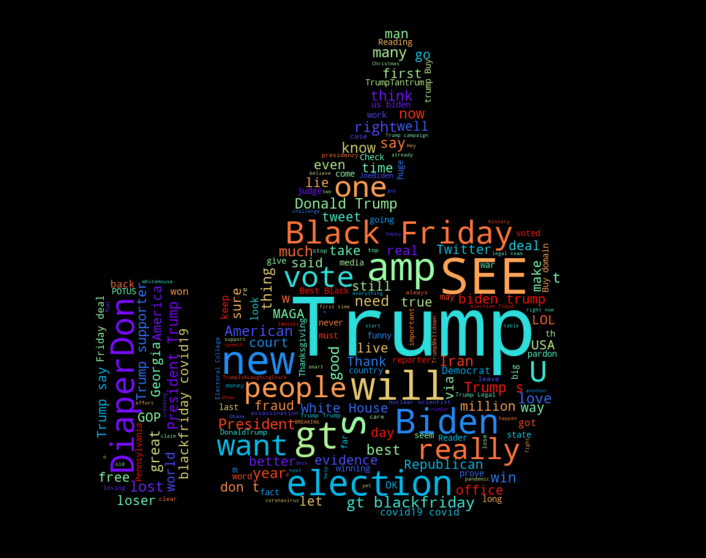

In [79]:
TextP=' '.join(positiveTweets['tweet'].tolist())
mask=np.array(Image.open('like.jpg'))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color='black', colormap='rainbow',stopwords=stopwords,mask=mask).generate(TextP)
plt.figure(linewidth=20,edgecolor="black",figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Nube de palabras para visualizar las palabras mas frecuentes presentes en los tweets clasificados como negativos.

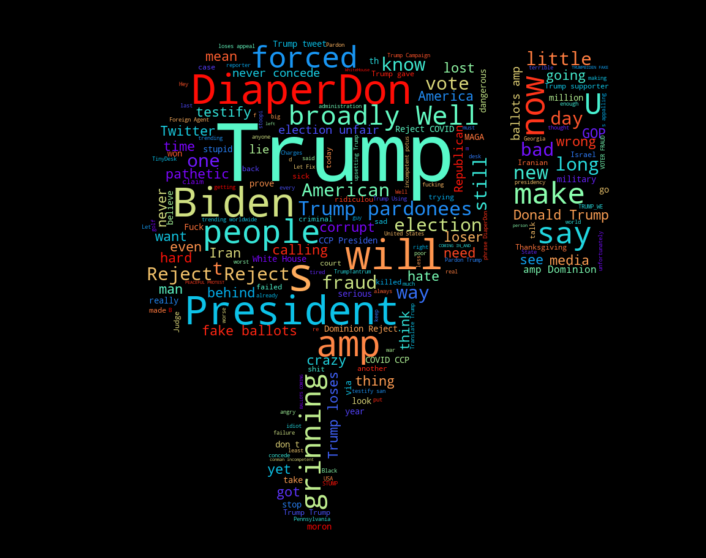

In [80]:
TextN=' '.join(negativeTweets['tweet'].tolist())
mask=np.array(Image.open('dislike.jpg'))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color='black', colormap='rainbow',stopwords=stopwords,mask=mask).generate(TextN)
plt.figure(linewidth=20,edgecolor="black",figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()